In [1]:
from matplotlib import image
from matplotlib import pyplot

In [2]:
import time

In [3]:
import os
import numpy as np
import cv2
import glob
import shutil
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
base_dir = '../plant-seedlings-classification/data'

In [9]:
base_dir

'../plant-seedlings-classification/data'

In [10]:
len(os.listdir(base_dir))

14

In [11]:
classes = os.listdir(base_dir)

In [12]:
#for cl in classes:
#  images = glob.glob(img_path + '/*.png')
#  print("{}: {} Images".format(cl, len(images)))
#  num_train = int(round(len(images)*0.8))
#  train, val = images[:num_train], images[num_train:]

#  for t in train:
#    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#      os.makedirs(os.path.join(base_dir, 'train', cl))
#    shutil.move(t, os.path.join(base_dir, 'train', cl))

#  for v in val:
#    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
#      os.makedirs(os.path.join(base_dir, 'val', cl))
#    shutil.move(v, os.path.join(base_dir, 'val', cl))

In [13]:
#round(len(images)*0.8)

In [14]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [15]:
batch_size = 100
IMG_SHAPE = 150 

In [16]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 3801 images belonging to 12 classes.


In [17]:
train_data_gen

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [19]:
#augmented_images

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

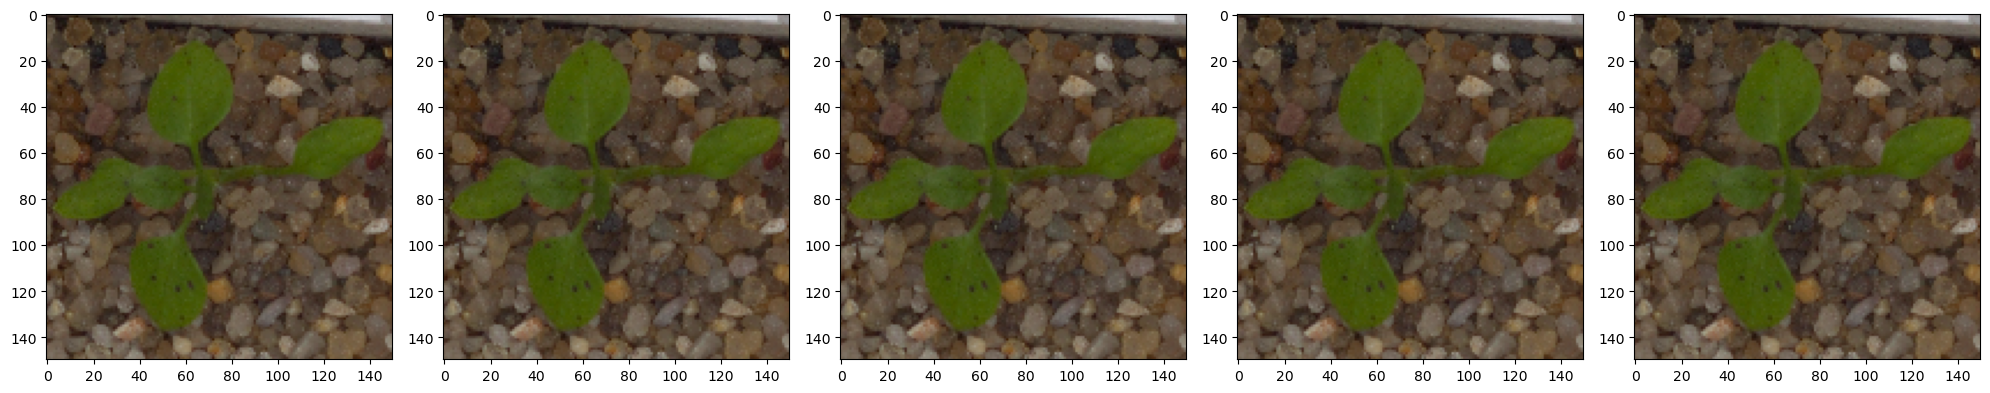

In [21]:
plotImages(augmented_images)

In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 949 images belonging to 12 classes.


In [29]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(12))

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [32]:
epochs = 30

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/30
39/39 [==============================] - 77s 2s/step - loss: 2.3046 - accuracy: 0.2213 - val_loss: 1.8071 - val_accuracy: 0.3583
Epoch 2/30
39/39 [==============================] - 76s 2s/step - loss: 1.6360 - accuracy: 0.4317 - val_loss: 1.3809 - val_accuracy: 0.5522
Epoch 3/30
39/39 [==============================] - 77s 2s/step - loss: 1.3421 - accuracy: 0.5372 - val_loss: 1.2147 - val_accuracy: 0.5964
Epoch 4/30
39/39 [==============================] - 76s 2s/step - loss: 1.1362 - accuracy: 0.6135 - val_loss: 1.0085 - val_accuracy: 0.6554
Epoch 5/30
39/39 [==============================] - 76s 2s/step - loss: 0.9352 - accuracy: 0.6867 - val_loss: 0.8668 - val_accuracy: 0.6965
Epoch 6/30
39/39 [==============================] - 78s 2s/step - loss: 0.8079 - accuracy: 0.7282 - val_loss: 0.8208 - val_accuracy: 0.7387
Epoch 7/30
39/39 [==============================] - 78s 2s/step - loss: 0.6652 - accuracy: 0.7740 - val_loss: 0.7892 - val_accuracy: 0.7292
Epoch 8/30
39/39 [==

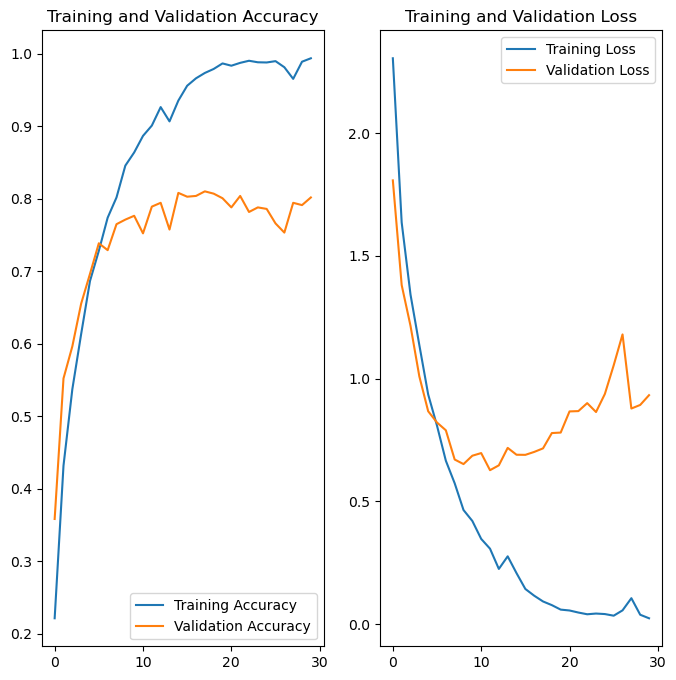

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1672100291.h5


In [59]:
ls

 磁碟區 C 中的磁碟是 Windows
 磁碟區序號:  3A4A-CD56

 C:\Users\spin\Desktop\tensorFinal\plantSeedlings\plant-seedlings-classification 的目錄

2022/12/19  下午 01:52    <DIR>          .
2022/12/19  下午 01:52    <DIR>          ..
2022/12/19  上午 10:01    <DIR>          .ipynb_checkpoints
2022/12/19  下午 01:50       127,831,776 1671429037.h5
2022/12/19  上午 11:02    <DIR>          data
2022/12/19  下午 01:52           978,805 DecNineteen.ipynb
2019/12/11  下午 11:36            19,863 sample_submission.csv
2022/12/19  上午 10:26    <DIR>          test
               3 個檔案     128,830,444 位元組
               5 個目錄  93,878,751,232 位元組可用


In [34]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'train',
 'val']

In [35]:
test_dir = '../plant-seedlings-classification/test'

In [36]:
len(os.listdir(test_dir))

1

In [37]:
tclasses = os.listdir(test_dir)
tclasses[0]

'testdata'

In [38]:
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_train.flow_from_directory(
                                                directory=test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 794 images belonging to 1 classes.


In [39]:
len(test_data_gen)

25

In [40]:
test_data_gen[0]

(array([[[[0.53333336, 0.52156866, 0.4431373 ],
          [0.56078434, 0.54901963, 0.48235297],
          [0.57254905, 0.56078434, 0.5019608 ],
          ...,
          [0.30588236, 0.25490198, 0.20000002],
          [0.3019608 , 0.24705884, 0.18823531],
          [0.30588236, 0.2392157 , 0.19215688]],
 
         [[0.5529412 , 0.5372549 , 0.47058827],
          [0.5686275 , 0.54901963, 0.48627454],
          [0.5647059 , 0.5372549 , 0.4784314 ],
          ...,
          [0.30588236, 0.26666668, 0.20784315],
          [0.3254902 , 0.2784314 , 0.227451  ],
          [0.29803923, 0.2392157 , 0.19607845]],
 
         [[0.56078434, 0.5411765 , 0.47450984],
          [0.5686275 , 0.5411765 , 0.4784314 ],
          [0.5686275 , 0.5372549 , 0.4784314 ],
          ...,
          [0.3137255 , 0.27450982, 0.21960786],
          [0.32941177, 0.28627452, 0.23137257],
          [0.31764707, 0.26666668, 0.21960786]],
 
         ...,
 
         [[0.2627451 , 0.19215688, 0.14901961],
          [0.25490

In [41]:
images = [test_data_gen[0][0][0] for i in range(5)]

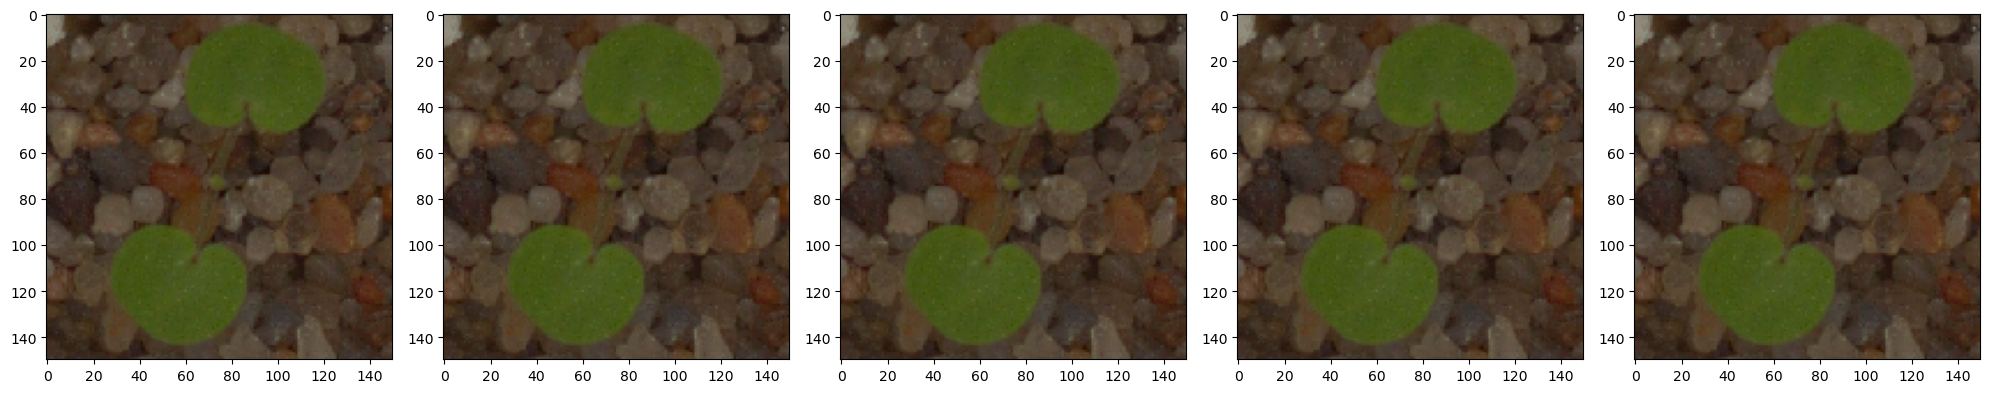

In [42]:
plotImages(images)

In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [44]:
le = LabelEncoder()
le.fit(os.listdir(train_dir))

LabelEncoder()

In [45]:
os.listdir(train_dir)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [46]:
testdata_dir = test_dir + '/testdata'
testdata_dir

'../plant-seedlings-classification/test/testdata'

In [47]:
len(os.listdir(testdata_dir))

794

In [48]:
testdata = os.listdir(testdata_dir)

In [49]:
PredStr = list(le.inverse_transform(results))

NameError: name 'results' is not defined

In [50]:
result = {'file':testdata,'species':PredStr}
result = pd.DataFrame(result)
result.to_csv("Prediction1227.csv",index=False)

NameError: name 'PredStr' is not defined

In [51]:
test_tal_num = 0
im = []
allimages= []
img_path = os.path.join(test_dir, 'testdata')
images = glob.glob(img_path + '/*.png')
allimages.extend(images)
#print("{}: {} Images".format(cl, len(images)))
test_tal_num += len(images)
#num_train = int(round(len(images)*0.8))
#train, val = images[:num_train], images[num_train:]

In [52]:
for i in range(len(images)):
    img = cv2.imread(allimages[i])
    img = tf.image.resize(img, [150,150])
    im.append(img)

In [53]:
im = np.array(im)/255.0
img_rgb = im[:,:,::-1]

In [54]:
im[1]

array([[[0.29623055, 0.41041827, 0.5102662 ],
        [0.26771843, 0.4036673 , 0.51577425],
        [0.3213987 , 0.4568081 , 0.55080324],
        ...,
        [0.1537933 , 0.15993704, 0.18273196],
        [0.17054035, 0.19241065, 0.22116764],
        [0.22021616, 0.2510492 , 0.27815554]],

       [[0.3029982 , 0.4114961 , 0.5032703 ],
        [0.29803923, 0.4237647 , 0.5297647 ],
        [0.2906843 , 0.4360843 , 0.5404359 ],
        ...,
        [0.14939138, 0.15718354, 0.18571225],
        [0.16827087, 0.18361115, 0.22247379],
        [0.21806635, 0.2376338 , 0.27423394]],

       [[0.28275818, 0.38875815, 0.49168867],
        [0.30011046, 0.42203203, 0.528032  ],
        [0.29761764, 0.4357756 , 0.54759365],
        ...,
        [0.13888879, 0.14423625, 0.16686258],
        [0.16963628, 0.17859052, 0.21083878],
        [0.22598676, 0.24328324, 0.27392137]],

       ...,

       [[0.18369207, 0.25723696, 0.3411716 ],
        [0.18431373, 0.24913001, 0.34898627],
        [0.16581142, 0

In [55]:
predictions = model.predict(im)

25/25 [==============================] - 2s 75ms/step


In [56]:
predictions

array([[-11.949614  ,  10.186057  ,  11.817654  , ...,  -5.597677  ,
          6.5536957 ,   3.4132037 ],
       [ -0.18523598,  -1.0267868 ,   3.7403526 , ..., -10.331116  ,
         -2.4547563 ,  -0.28091672],
       [ -2.6076913 ,   0.5201787 ,   4.7124    , ...,  -8.149045  ,
         -3.4346943 ,   3.2866588 ],
       ...,
       [ -2.8648505 ,  -0.45386663,   5.260821  , ...,  -5.290814  ,
         -3.188235  ,   3.0799139 ],
       [-14.744938  ,  11.52658   ,  15.364488  , ...,  -4.686027  ,
          4.728781  ,   0.7678244 ],
       [  1.8256917 ,  -5.8105445 ,  -0.42389917, ..., -15.301964  ,
         -2.3236175 ,  -1.7712761 ]], dtype=float32)

In [57]:
results = []
for i in range(predictions.shape[0]):
    results.append(np.argmax(predictions[i]))

In [58]:
PredStr = list(le.inverse_transform(results))

In [61]:
result = {'file':testdata,'species':PredStr}
result = pd.DataFrame(result)
result.to_csv("Prediction1227_1.csv",index=False)
#score : 0.22